# PBMC vs Tissue Figures

## Inputs

In [1]:
source('jupyterFunctions_perCellType.R')

In [2]:
data_prefix <- paste(sep='','../data/PBMCvsTissue/')
Tcell_PvT <- readRDS(paste(sep='',data_prefix,'Tcell_PBMCvsTissue_df.rds'))
Bcell_PvT <- readRDS(paste(sep='',data_prefix,'Bcell_PBMCvsTissue_df.rds'))
myeloid_PvT <- readRDS(paste(sep='',data_prefix,'myeloid_PBMCvsTissue_df.rds'))

In [3]:
tissue_color <- 'slateblue3'
PBMC_color <- 'brown3'

In [24]:
save_dir <- NA #'../output_v9/' #or NA if don't want to save
file_extension <- '.pdf'

## T cell

In [5]:
Tcell_res <- 'hres_0.40'
if(!(Tcell_res %in% colnames(Tcell_PvT))) stop('cluster resolution not in df')

In [6]:
Tcell_tissue_clusters <- sort(unique(Tcell_PvT[which(Tcell_PvT$bio_src=='tissue'),'bio_src_cellType']))
Tcell_PBMC_clusters <- sort(unique(Tcell_PvT[which(Tcell_PvT$bio_src=='PBMC'),'bio_src_cellType']))

Tcell_colors <- c(rep(tissue_color,length(Tcell_tissue_clusters)),rep(PBMC_color,length(Tcell_PBMC_clusters)))
names(Tcell_colors) <- c(Tcell_tissue_clusters,Tcell_PBMC_clusters)

In [7]:
ll <- table(Tcell_PvT[which(Tcell_PvT$bio_src=='PBMC'),'bio_src_cellType'])
Tcell_tooSmall <- names(ll[ll<10])

In [8]:
Tcell_original_order <- c('TA-0: CD8A+ GZMK+','PBMC CD8 TEM','PBMC CD8 TCM','PBMC CD4 Proliferating','PBMC CD4 CTL',
                          'TA-4: CD8A+ PRF1+ cytotoxic','PBMC MAIT','PBMC gdT',
                          'TA-1: CD4+ IL7R+','PBMC CD4 TCM','PBMC CD4 TEM','PBMC CD8 Naive','PBMC CD4 Naive',
                          'TA-2: CD4+ PD-1+ TFH/TPH',
                          'TA-3: CD4+ IKZF2+ Treg','PBMC Treg',
                          'PBMC dnT')
if(!all(Tcell_original_order %in% unique(Tcell_PvT$bio_src_cellType))) stop('original order insufficient')

Tcell_PvT_order <- c(1,4,6,0,2,3,7,5)
if(!all(Tcell_PvT_order %in% unique(Tcell_PvT[,Tcell_res]))) stop('cluster order insufficient')

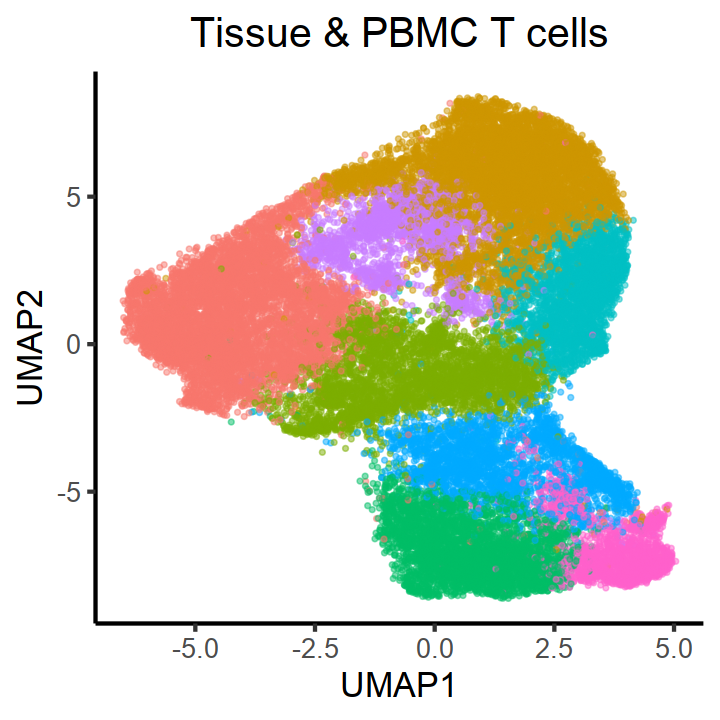

In [9]:
#Sig S9a left

Tcell_cluster_colors <- hue_pal()(length(unique(Tcell_PvT[,Tcell_res])))
names(Tcell_cluster_colors) <- sort(unique(Tcell_PvT[,Tcell_res]))

options(repr.plot.height=6,repr.plot.width=6)
g <- ggplot(Tcell_PvT[which(!(Tcell_PvT$bio_src_cellType %in% Tcell_tooSmall)),],
            aes_string(x='UMAP1',y='UMAP2',color=Tcell_res)) + 
        geom_point(size=1,alpha=0.5) + theme_classic(base_size=20) + scale_color_manual(values=Tcell_cluster_colors) + 
        theme(legend.position="none") +
        ggtitle('Tissue & PBMC T cells') + theme(plot.title = element_text(hjust = 0.5))
print(g)

if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,'Tcell_PBMCvsTissue_UMAP',file_extension),
                            plot=g,units='in',height=6,width=6,dpi=600)

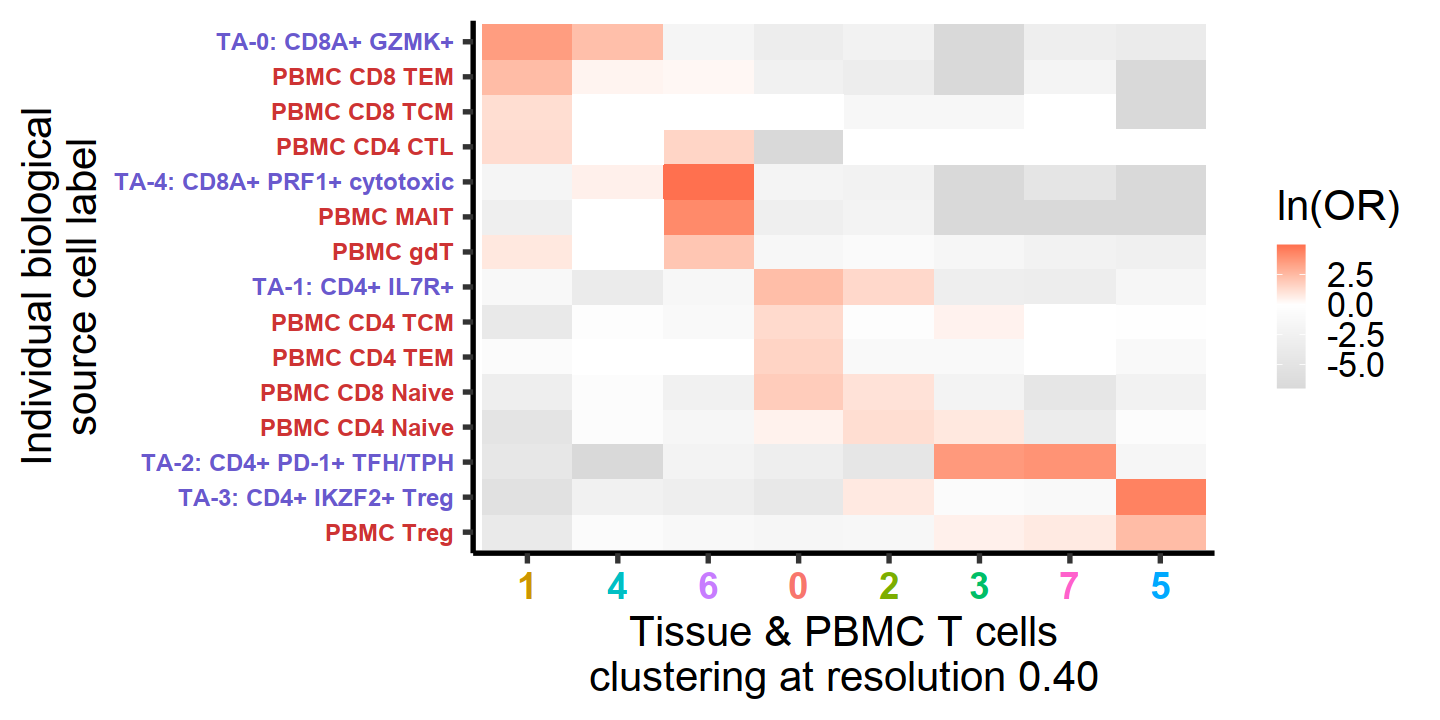

In [10]:
#Fig S9a right

Tcell_fisher_df <- calc_OR(Tcell_PvT[which(!(Tcell_PvT$bio_src_cellType %in% Tcell_tooSmall)),],
                            Tcell_res, 'bio_src_cellType')

g <- plot_OR(Tcell_fisher_df, Tcell_res, 'bio_src_cellType',
             paste('Tissue & PBMC T cells\nclustering at resolution',str_split_fixed(Tcell_res,'_',2)[,2]),
             'Individual biological\nsource cell label',
             Tcell_PvT_order, Tcell_original_order,clustColors=c(Tcell_colors,Tcell_cluster_colors))
g <- g + theme(axis.text.x=element_text(size=22))

options(repr.plot.height=6,repr.plot.width=12)
print(g)

if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,save_dir,'Tcell_PBMCvsTissue_OR_heatmap',file_extension),
                            plot=g,units='in',height=6,width=12,dpi=600)

## Myeloid

In [11]:
myeloid_res <- 'hres_0.20'
if(!(myeloid_res %in% colnames(myeloid_PvT))) stop('cluster resolution not in df')

In [12]:
myeloid_tissue_clusters <- sort(unique(myeloid_PvT[which(myeloid_PvT$bio_src=='tissue'),'bio_src_cellType']))
myeloid_PBMC_clusters <- sort(unique(myeloid_PvT[which(myeloid_PvT$bio_src=='PBMC'),'bio_src_cellType']))

myeloid_colors <- c(rep(tissue_color,length(myeloid_tissue_clusters)),rep(PBMC_color,length(myeloid_PBMC_clusters)))
names(myeloid_colors) <- c(myeloid_tissue_clusters,myeloid_PBMC_clusters)

In [13]:
ll <- table(myeloid_PvT[which(myeloid_PvT$bio_src=='PBMC'),'bio_src_cellType'])
myeloid_tooSmall <- names(ll[ll<10])

In [14]:
myeloid_original_order <- c('MA-0: F13A1+ MARCKS+ TRM','PBMC CD16 Mono','PBMC CD14 Mono',
                            'MA-1: FCN1+ SAMSN1+ infiltrating monocytes',
                            'MA-2: LYVE1+ TIMD4+ TRM',
                            'MA-4: SPP1+ FABP5+ intermediate',
                            'MA-3: CD1C+ AFF3+ DC','PBMC cDC1','PBMC cDC2','PBMC pDC')
if(!all(myeloid_original_order %in% unique(myeloid_PvT$bio_src_cellType))) stop('original order insufficient')

myeloid_PvT_order <- c(0,6,1,2,3,4,5)
if(!all(myeloid_PvT_order %in% unique(myeloid_PvT[,myeloid_res]))) stop('cluster order insufficient')

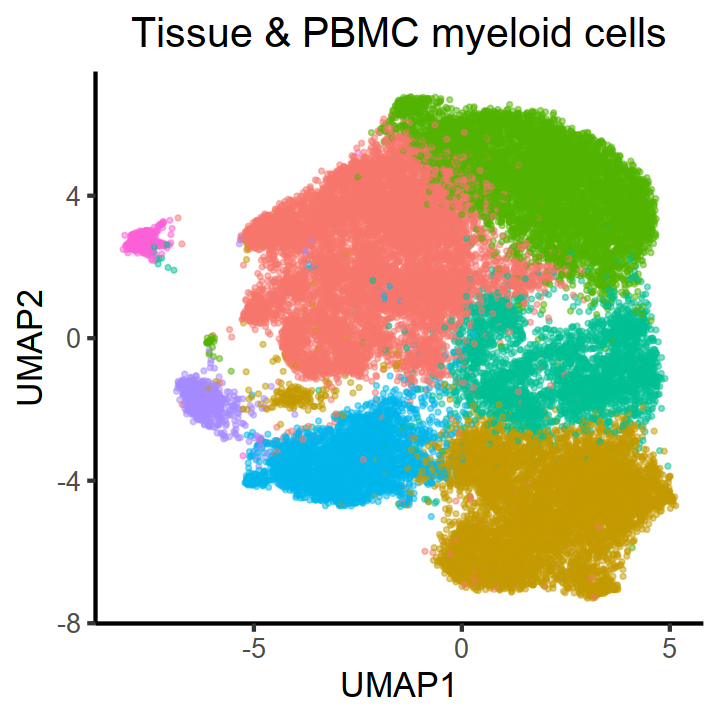

In [15]:
#Sig S9b left

myeloid_cluster_colors <- hue_pal()(length(unique(myeloid_PvT[,myeloid_res])))
names(myeloid_cluster_colors) <- sort(unique(myeloid_PvT[,myeloid_res]))

options(repr.plot.height=6,repr.plot.width=6)
g <- ggplot(myeloid_PvT[which(!(myeloid_PvT$bio_src_cellType %in% myeloid_tooSmall)),],
            aes_string(x='UMAP1',y='UMAP2',color=myeloid_res)) + 
        geom_point(size=1,alpha=0.5) + theme_classic(base_size=20) + scale_color_manual(values=myeloid_cluster_colors) + 
        theme(legend.position="none") +
        ggtitle('Tissue & PBMC myeloid cells') + theme(plot.title = element_text(hjust = 0.5))
print(g)

if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,'myeloid_PBMCvsTissue_UMAP',file_extension),
                            plot=g,units='in',height=6,width=6,dpi=600)

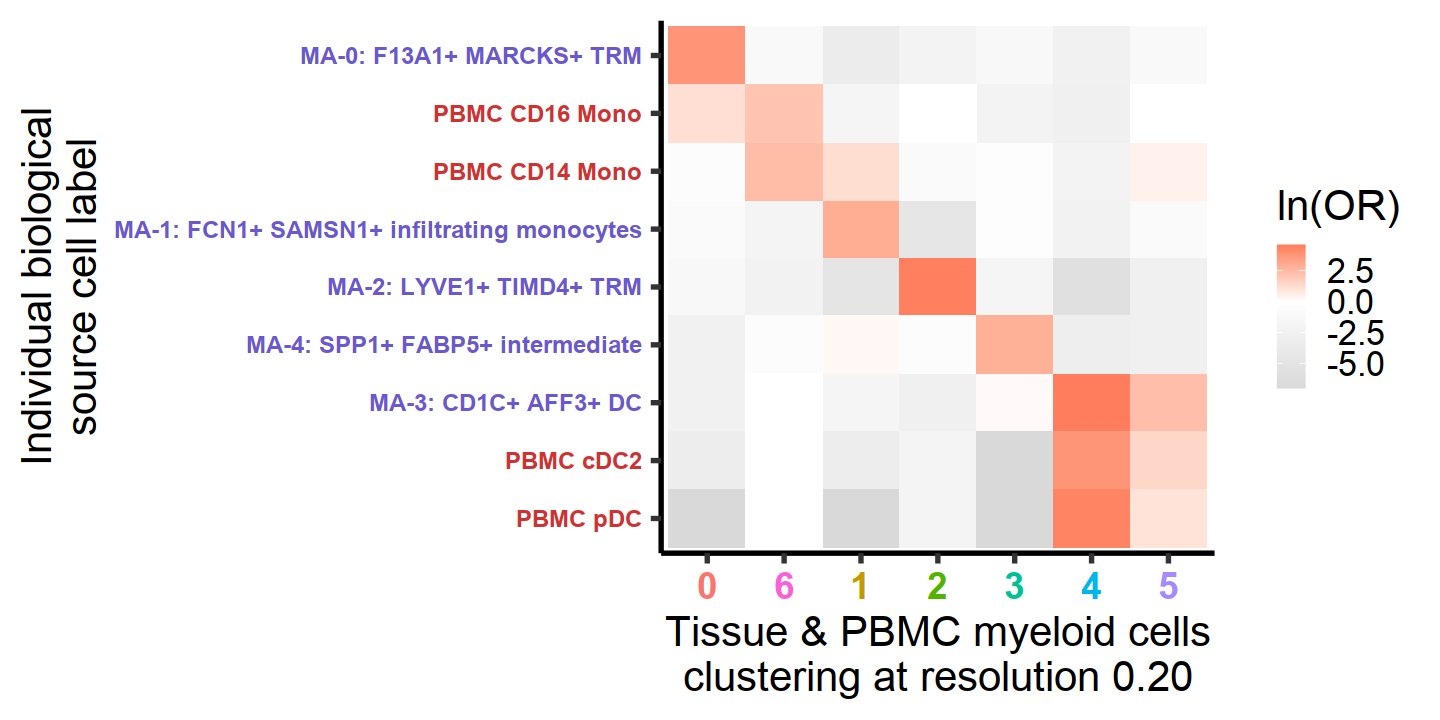

In [16]:
#Fig S9b right

myeloid_fisher_df <- calc_OR(myeloid_PvT[which(!(myeloid_PvT$bio_src_cellType %in% myeloid_tooSmall)),],
                            myeloid_res, 'bio_src_cellType')

g <- plot_OR(myeloid_fisher_df, myeloid_res, 'bio_src_cellType',
             paste('Tissue & PBMC myeloid cells\nclustering at resolution',str_split_fixed(myeloid_res,'_',2)[,2]),
             'Individual biological\nsource cell label',
             myeloid_PvT_order, myeloid_original_order,clustColors=c(myeloid_colors,myeloid_cluster_colors))
g <- g + theme(axis.text.x=element_text(size=22))

options(repr.plot.height=6,repr.plot.width=12)
print(g)

if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,save_dir,'myeloid_PBMCvsTissue_OR_heatmap',file_extension),
                            plot=g,units='in',height=6,width=12,dpi=600)

## B cell

In [17]:
Bcell_res <- 'hres_0.60'
if(!(Bcell_res %in% colnames(Bcell_PvT))) stop('cluster resolution not in df')

In [18]:
Bcell_tissue_clusters <- sort(unique(Bcell_PvT[which(Bcell_PvT$bio_src=='tissue'),'bio_src_cellType']))
Bcell_PBMC_clusters <- sort(unique(Bcell_PvT[which(Bcell_PvT$bio_src=='PBMC'),'bio_src_cellType']))

Bcell_colors <- c(rep(tissue_color,length(Bcell_tissue_clusters)),rep(PBMC_color,length(Bcell_PBMC_clusters)))
names(Bcell_colors) <- c(Bcell_tissue_clusters,Bcell_PBMC_clusters)

In [19]:
ll <- table(Bcell_PvT[which(Bcell_PvT$bio_src=='PBMC'),'bio_src_cellType'])
Bcell_tooSmall <- names(ll[ll<10])

In [20]:
Bcell_original_order <- c('BA-3: FCER2+ IGHD+ naive B','PBMC B naive',
                          'BA-4: CD24+ MAST4+ unswitched memory B','PBMC B intermediate',
                          'BA-2: TOX+ PDE4D+ switched memory B','PBMC B memory',
                          'BA-5: ITGAX+ ABC',
                          'BA-1: CD27+ plasma','BA-0: CREB3L2+ plasma','PBMC Plasmablast')
if(!all(Bcell_original_order %in% unique(Bcell_PvT$bio_src_cellType))) stop('original order insufficient')

Bcell_PvT_order <- c(4,2,3,5,1,0,6,7)
if(!all(Bcell_PvT_order %in% unique(Bcell_PvT[,Bcell_res]))) stop('cluster order insufficient')

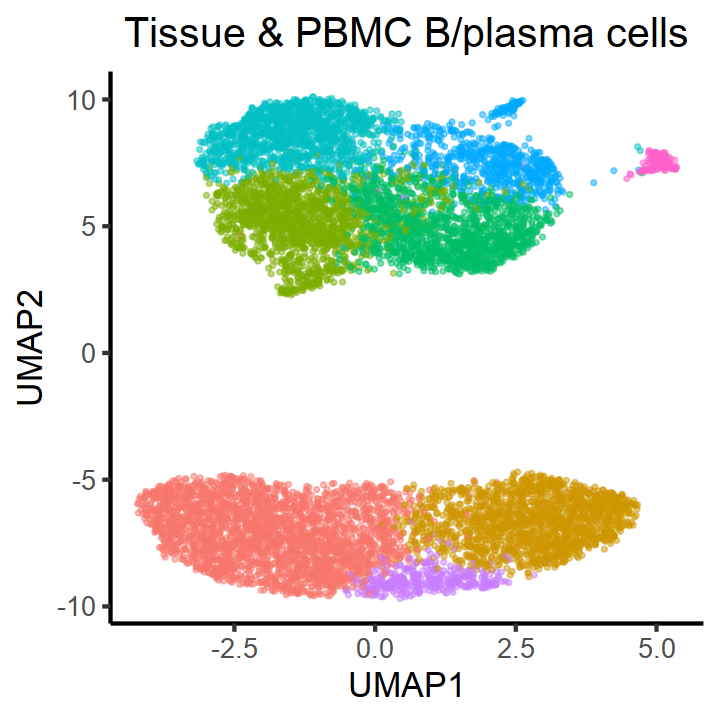

In [21]:
#Sig S9c left

Bcell_cluster_colors <- hue_pal()(length(unique(Bcell_PvT[,Bcell_res])))
names(Bcell_cluster_colors) <- sort(unique(Bcell_PvT[,Bcell_res]))

options(repr.plot.height=6,repr.plot.width=6)
g <- ggplot(Bcell_PvT[which(!(Bcell_PvT$bio_src_cellType %in% Bcell_tooSmall)),],
            aes_string(x='UMAP1',y='UMAP2',color=Bcell_res)) + 
        geom_point(size=1,alpha=0.5) + theme_classic(base_size=20) + scale_color_manual(values=Bcell_cluster_colors) + 
        theme(legend.position="none") +
        ggtitle('Tissue & PBMC B/plasma cells') + theme(plot.title = element_text(hjust = 0.5))
print(g)

if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,'Bcell_PBMCvsTissue_UMAP',file_extension),
                            plot=g,units='in',height=6,width=6,dpi=600)

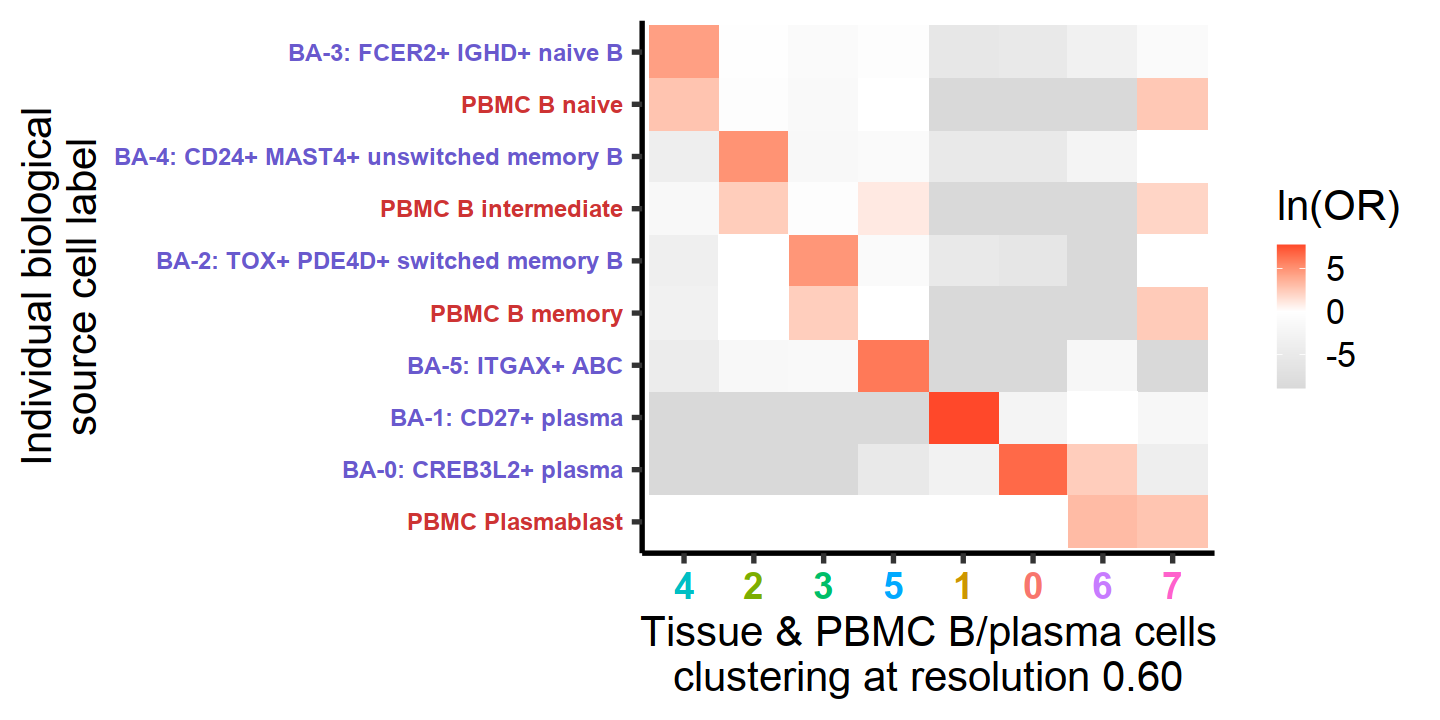

In [22]:
#Fig S9c right

Bcell_fisher_df <- calc_OR(Bcell_PvT[which(!(Bcell_PvT$bio_src_cellType %in% Bcell_tooSmall)),],
                            Bcell_res, 'bio_src_cellType')

g <- plot_OR(Bcell_fisher_df, Bcell_res, 'bio_src_cellType',
             paste('Tissue & PBMC B/plasma cells\nclustering at resolution',str_split_fixed(Bcell_res,'_',2)[,2]),
             'Individual biological\nsource cell label',
             Bcell_PvT_order, Bcell_original_order,clustColors=c(Bcell_colors,Bcell_cluster_colors))
g <- g + theme(axis.text.x=element_text(size=22))

options(repr.plot.height=6,repr.plot.width=12)
print(g)

if(!is.na(save_dir)) ggsave(file=paste(sep='',save_dir,save_dir,'Bcell_PBMCvsTissue_OR_heatmap',file_extension),
                            plot=g,units='in',height=6,width=12,dpi=600)

## Session Info

In [23]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server release 6.5 (Santiago)

Matrix products: default
BLAS/LAPACK: /PHShome/kew47/miniconda3/lib/R/lib/libRblas.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] repr_1.0.1         gridExtra_2.3      RColorBrewer_1.1-2 scales_1.1.1      
 [5] viridis_0.5.1      viridisLite_0.3.0  ggrepel_0.8.2      ggrastr_0.2.3     
 [9] tidyr_1.0.3        stringr_1.4.0      ggpubr_0.4.0       ggplot2_3.3.0     
[13] presto_1.0.0       Rcpp_1.0.4.6       ROCR_1.0-7         gplots_3.0.1.1    
[17] Rmisc_1.5.1        plyr_1.8.6         lattice_0.20-41    gtools_3.8.2      
[21] Matrix_1.2-18     

loaded via a namespace (and not attached):
 [1] digest_0.6.25       IRdisplay_0.7.0     R6_2.4.1           
 [4] cellranger_1.1.0    backports_1.1.6     evaluate_0.14      
